In [310]:
#Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
#Ctrl + Q -> get function doc
#Specify column data types for read_excel 'dtype' parameter using a dictionary
#Can we convert some of these into boolean types and enums
varus_valgus_dtypes = {
    'Study ID':int,
    'Laterality (Right =1; Left = 2)':np.float64,
    'Team Member Med Hist Review':str,
    'Team Member XRay Review':str,
    'Meets Inclusion: (Y=1; N=2)':str,
    'Nav or Conventional (Nav=1; Con=2)':np.float64,
    'Nav #':np.float64,
    'MD (Phillips = 1; Rachala = 2)':str,
    'Age at Surgery':np.float64,
    'Length of FU (Days)':np.float64,
    'Sex (M=1; F=2)':np.float64,
    'Ht (in)':np.float64,
    'Wt (lbs)':np.float64,
    'BMI (kg/m2)':np.float64,
    'Osteoporosis/Osteopenia (Y=1; N=2)':str,
    'Smoker (Current=1; Former=2; Never=3)':str,
    'Diabetes (Y=1; N=2)':str,
    'Comorbitities (Less than or equal to two = 1; Three or more = 2) WRITE "Less" or "More"':np.float64,
    'Diagnosis (OA = 1; IA = 2; PTOA = 3; OA + IA = 4; OA + PTOA = 5)':str,
    'Presence of PreOp Flexion Contracture (Y=1; N=2)':str,
    'Nav PreOp Measurement (degree; Valgus is negative)':np.float64,
    'Nav PostOp Measurement (degree; Valgus is negative)':np.float64,
    'Nav PreOp Check':str,
    'Nav PostOp Check':str,
    'Group (Control=1; Outlier=2)':str,
    'PreOp Extension (degrees; hyperextension is negative)':np.float64,
    'PostOp Extension at Final FU (degrees; hyperextension is negative)':np.float64,
    'PreOp Flexion (degrees)':np.float64,
    'PostOp Flexion (degrees)':np.float64,
    'Tourniquet time (min)':np.float64,
    'OR time (min)':np.float64,
    'Estimated Blood Loss (ml)':np.float64,
    'Tibial plateau fracture (Y=1; N=2)':str,
    'Tibial component size':np.float64,
    'Femoral component size':np.float64,
    'Length of Stay (days)':np.float64,
    'Discharge destination (1=home; 2=rehab)':str,
    'Readmission w/in 90 days (Y=1; N=2)':str,
    'Reason for Readmission':str,
    'Reoperation (Y=1; N=2)':str,
    'Reason for reoperation':str,
    'PostOp Infection  (Y=1; N=2)':str,
    'PreOp Mechanical axis':np.float64,
    '3mo PostOp Mechanical axis':np.float64,
    'Final FU Mechanical axis':np.float64,
    'PreOp Posterior Tibial Slope':np.float64,
    'PostOp Posterior Tibial Slope':np.float64,
    'PreOp Proximal Medial Tibial Angle':np.float64,
    'PostOp Proximal Medial Tibial Angle':np.float64,
    'PreOp Lateral Distal Femoral Angle':np.float64,
    '3 mo PostOp Lateral Distal Femoral Angle':np.float64,
    'Final FU Lateral Distal Femoral Angle':np.float64,
    'PostOp Patellar Tilt':np.float64,
    'Evidence of Hardware Failure (Y=1; N=2)':str,
    'Fracture   (Y=1; N=2)':str,
    'Subsidence   (Y=1; N=2)':str,
    'Loosening   (Y=1; N=2)':str,
    'Polyethylene Wear (Y=1; N=2)':str,
    '3mo PostOp Radiolucent lines (Y=1; N=2)':str,
    'Final FU Radiolucent lines (Y=1; N=2)':str,
    '3mo PostOp Stress shielding (Y=1; N=2)':str,
    'Final FU Stress shielding (Y=1; N=2)':str,
    'UBMD General Function VAS Score 2 wk':np.float64,
    'UBMD General Function VAS Score 6 wk':np.float64,
    'UBMD General Function VAS Score 3 mo':np.float64,
    'UBMD General Function VAS Score 1 yr':np.float64,
    'UBMD General Pain VAS Score 2 wk':np.float64,
    'UBMD General Pain VAS Score 6 wk':np.float64,
    'UBMD General Pain VAS Score 3 mo':np.float64,
    'UBMD General Pain VAS Score 1 yr':np.float64,
    'SF-12 Physical Health Score 6 wk':np.float64,
    'SF-12 Physical Health Score 3 mo':np.float64,
    'SF-12 Physical Health Score 1 yr':np.float64,
    'VR-12 Physical Score 6 wk':np.float64,
    'VR-12 Physical Score 3 mo':np.float64,
    'VR-12 Physical Score 1 yr':np.float64,
    'VR6D Score 6 wk':np.float64,
    'VR6D Score 3 mo':np.float64,
    'VR6D Score 1 yr':np.float64,
    'KSS-Functional Knee Score 2 wk':np.float64,
    'KSS-Functional Knee Score 6 wk':np.float64,
    'KSS-Functional Knee Score 3 mo':np.float64,
    'KSS-Functional Knee Score 1 yr':np.float64,
    'KSS-Objective Knee Score (Pain) Score 2 wk':np.float64,
    'KSS-Objective Knee Score (Pain) Score 6 wk':np.float64,
    'KSS-Objective Knee Score (Pain) Score 3 mo':np.float64,
    'KSS-Objective Knee Score (Pain) Score 1 yr':np.float64,
    'LEAS Score 2 wk':np.float64,
    'LEAS Score 6 wk':np.float64,
    'LEAS Score 3 mo':np.float64,
    'LEAS Score 1 yr':np.float64
}

#Read-in the data file
varus_valgus_original = pd.read_excel('varus_valgus.xlsx', dtype=varus_valgus_dtypes)


#Questions for the group:
# Will we treat varus and valgus separately?
# Will we look at Rachala and Philips separately or as a group?

In [312]:
#Consider a dual index for outliers (use zip command and hier_index)
varus_valgus_original.set_index('Study ID', inplace=True)

In [313]:
#Data cleaning step (missing data etc.)
#df.dropna(axis=1) for columns df.fillna()

In [314]:
#Filter the original data for outliers
#Any deviation of mechanical axis of 10 or more from normal, according to either Nav or XR measurement
varus_valgus_outliers = varus_valgus_original[(abs(varus_valgus_original['PreOp Mechanical axis']) >= 10) |
                                              (abs(varus_valgus_original['Nav PreOp Measurement (degree; Valgus is negative)']) >= 10)]
varus_valgus_outliers

,Laterality (Right =1; Left = 2),Team Member Med Hist Review,Team Member XRay Review,Meets Inclusion: (Y=1; N=2),Nav or Conventional (Nav=1; Con=2),Nav #,MD (Phillips = 1; Rachala = 2),Age at Surgery,Length of FU (Days),Sex (M=1; F=2),...,KSS-Functional Knee Score 3 mo,KSS-Functional Knee Score 1 yr,KSS-Objective Knee Score (Pain) Score 2 wk,KSS-Objective Knee Score (Pain) Score 6 wk,KSS-Objective Knee Score (Pain) Score 3 mo,KSS-Objective Knee Score (Pain) Score 1 yr,LEAS Score 2 wk,LEAS Score 6 wk,LEAS Score 3 mo,LEAS Score 1 yr
Study ID,,,,,,,,,,,,,,,,,,,,,
7,2.0,Hailley,Andrey,1,1.0,3056.0,1,69.0,123.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2.0,Hailley,Andrey,1,1.0,3066.0,1,71.0,106.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,1.0,Hailley,Andrey,1,1.0,3068.0,1,58.0,169.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2.0,Hailley,Andrey,1,1.0,3074.0,1,54.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1.0,Hailley,Andrey,1,1.0,3082.0,1,77.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1.0,Andrey,NaN,1,1.0,3050.0,1,51.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Andrey,NaN,1,1.0,3051.0,1,63.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2.0,Andrey,NaN,1,1.0,3058.0,1,74.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
#Verify varus valgus discrepancy b/w Nav and manual
varus_outliers = varus_valgus_outliers = varus_valgus_outliers[(varus_valgus_outliers['PreOp Mechanical axis'] >= 10) |
                                                              (varus_valgus_outliers['Nav PreOp Measurement (degree; Valgus is negative)'] >= 10)]

#Display discrepancies where XR measurement of mechanical axis does not equal NAV data
varus_outliers[varus_outliers['PreOp Mechanical axis'] != varus_outliers['Nav PreOp Measurement (degree; Valgus is negative)']][['PreOp Mechanical axis', 'Nav PreOp Measurement (degree; Valgus is negative)']]

,PreOp Mechanical axis,Nav PreOp Measurement (degree; Valgus is negative)
Study ID,,
7,13.0,10.0
17,15.0,11.5
22,12.0,10.0
29,12.0,10.0
38,12.0,10.5
...,...,...
497,12.0,10.0
498,13.0,10.0
1,11.0,9.0


In [316]:
#Favor XR measurements over Nav
varus_outliers = varus_valgus_outliers[(varus_valgus_outliers['PreOp Mechanical axis'] >= 10)]
varus_outliers

,Laterality (Right =1; Left = 2),Team Member Med Hist Review,Team Member XRay Review,Meets Inclusion: (Y=1; N=2),Nav or Conventional (Nav=1; Con=2),Nav #,MD (Phillips = 1; Rachala = 2),Age at Surgery,Length of FU (Days),Sex (M=1; F=2),...,KSS-Functional Knee Score 3 mo,KSS-Functional Knee Score 1 yr,KSS-Objective Knee Score (Pain) Score 2 wk,KSS-Objective Knee Score (Pain) Score 6 wk,KSS-Objective Knee Score (Pain) Score 3 mo,KSS-Objective Knee Score (Pain) Score 1 yr,LEAS Score 2 wk,LEAS Score 6 wk,LEAS Score 3 mo,LEAS Score 1 yr
Study ID,,,,,,,,,,,,,,,,,,,,,
7,2.0,Hailley,Andrey,1,1.0,3056.0,1,69.0,123.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2.0,Hailley,Andrey,1,1.0,3066.0,1,71.0,106.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,1.0,Hailley,Andrey,1,1.0,3068.0,1,58.0,169.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2.0,Hailley,Andrey,1,1.0,3074.0,1,54.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1.0,Hailley,Andrey,1,1.0,3082.0,1,77.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2.0,Hailley,NaN,1,1.0,3661.0,1,57.0,362.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,1.0,Hailley,NaN,1,1.0,3663.0,1,74.0,328.0,1.0,...,20.0,NaN,NaN,NaN,50.0,NaN,NaN,NaN,6.0,NaN
1,1.0,Andrey,NaN,1,1.0,3050.0,1,51.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [317]:
#Varus Continuous
#Define a function to obtain descriptive statistics for a df
def get_descr_stats(df, column_names):
    return df[column_names].describe().transpose()


#Lists of columns for continuous varus data
basic_columns = ["Age at Surgery", "Length of FU (Days)", "BMI (kg/m2)"]
nav_columns = varus_outliers.columns.values[19:21].tolist()
misc_columns = varus_outliers.columns.values[24:31].tolist()
xr_columns = varus_outliers.columns.values[41:52].tolist()
column_continuous_lst = basic_columns + nav_columns + misc_columns + xr_columns


#Compute descriptive statistics using applied formatting
varus_outliers_descr_stats = get_descr_stats(varus_outliers, column_continuous_lst)
varus_outliers_descr_stats.style.format({'count':'{:.0f}'}).format(precision=2, subset=varus_outliers_descr_stats.columns[1:])


,count,mean,std,min,25%,50%,75%,max
Age at Surgery,94,67.28,8.88,51.00,61.00,66.50,73.00,89.00
Length of FU (Days),79,553.01,582.06,43.00,208.50,372.00,714.00,4068.00
BMI (kg/m2),94,34.84,9.21,20.94,27.37,33.36,40.33,63.41
Nav PreOp Measurement (degree; Valgus is negative),94,12.09,3.42,-11.50,10.50,12.00,13.50,22.00
Nav PostOp Measurement (degree; Valgus is negative),94,1.42,1.06,-1.00,0.50,1.50,2.00,4.00
PreOp Extension (degrees; hyperextension is negative),93,6.78,7.00,-12.00,2.50,7.50,10.50,23.50
PostOp Extension at Final FU (degrees; hyperextension is negative),93,2.28,1.32,-2.00,1.50,2.50,3.00,5.00
PreOp Flexion (degrees),93,133.65,9.30,107.50,129.00,134.50,139.50,162.50
PostOp Flexion (degrees),92,132.45,9.23,113.00,126.50,131.75,136.75,160.50
Tourniquet time (min),69,11.77,12.38,4.00,5.00,7.00,12.00,71.00


In [318]:
#Only Phillips Data in the outliers subset
#Group Analysis Example
smoker_groups = varus_outliers[column_continuous_lst + ['Smoker (Current=1; Former=2; Never=3)']].groupby('Smoker (Current=1; Former=2; Never=3)').describe().transpose()
smoker_groups.style.format('{:.1f}')

In [319]:
#Varus Categorical
column_categorical_lst = ['MD (Phillips = 1; Rachala = 2)', 'Sex (M=1; F=2)', 'Osteoporosis/Osteopenia (Y=1; N=2)', 'Smoker (Current=1; Former=2; Never=3)', 'Diabetes (Y=1; N=2)', 'Comorbitities (Less than or equal to two = 1; Three or more = 2) WRITE "Less" or "More"', 'Diagnosis (OA = 1; IA = 2; PTOA = 3; OA + IA = 4; OA + PTOA = 5)', 'Presence of PreOp Flexion Contracture (Y=1; N=2)', 'Tibial plateau fracture (Y=1; N=2)', 'Tibial component size', 'Femoral component size', 'Discharge destination (1=home; 2=rehab)', 'Readmission w/in 90 days (Y=1; N=2)', 'Reoperation (Y=1; N=2)', 'PostOp Infection  (Y=1; N=2)', 'Evidence of Hardware Failure (Y=1; N=2)', 'Fracture   (Y=1; N=2)', 'Subsidence   (Y=1; N=2)', 'Loosening   (Y=1; N=2)', 'Polyethylene Wear (Y=1; N=2)', '3mo PostOp Radiolucent lines (Y=1; N=2)', 'Final FU Radiolucent lines (Y=1; N=2)', '3mo PostOp Stress shielding (Y=1; N=2)', 'Final FU Stress shielding (Y=1; N=2)']

categorical_out = varus_outliers[column_categorical_lst].astype(dtype='category').describe().transpose()

#Format output as integers ('freq' was throwing errors when aggregate formatting was used)
categorical_out['count'] = categorical_out['count'].map('{:,.0f}'.format)
categorical_out['unique'] = categorical_out['unique'].map('{:,.0f}'.format)
categorical_out['top'] = categorical_out['top'].astype(int).map('{:,.0f}'.format)
categorical_out['freq'] = categorical_out['freq'].map('{:,.0f}'.format)

print(categorical_out)

                                                   count unique top freq
MD (Phillips = 1; Rachala = 2)                        94      1   1   94
Sex (M=1; F=2)                                        94      2   1   49
Osteoporosis/Osteopenia (Y=1; N=2)                    93      2   2   88
Smoker (Current=1; Former=2; Never=3)                 93      3   3   53
Diabetes (Y=1; N=2)                                   93      2   2   72
Comorbitities (Less than or equal to two = 1; T...    91      2   2   79
Diagnosis (OA = 1; IA = 2; PTOA = 3; OA + IA = ...    93      3   1   91
Presence of PreOp Flexion Contracture (Y=1; N=2)      93      2   1   76
Tibial plateau fracture (Y=1; N=2)                    89      1   2   89
Tibial component size                                 91      7   6   24
Femoral component size                                91      7   5   23
Discharge destination (1=home; 2=rehab)               91      2   1   55
Readmission w/in 90 days (Y=1; N=2)                

MD (Phillips = 1; Rachala = 2)


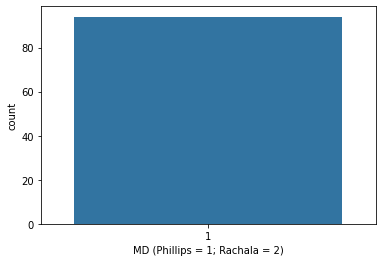

Sex (M=1; F=2)


C:\Users\andre\PycharmProjects\varus\venv\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


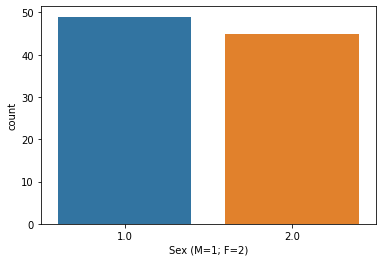

Osteoporosis/Osteopenia (Y=1; N=2)


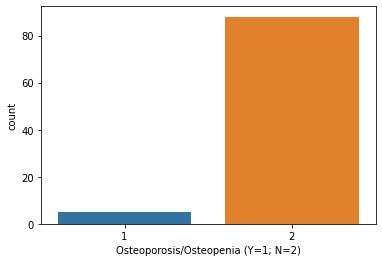

Smoker (Current=1; Former=2; Never=3)


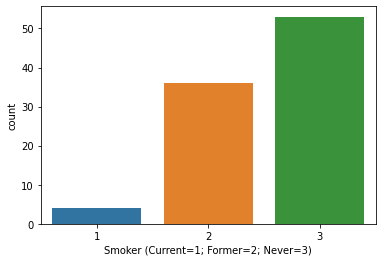

Diabetes (Y=1; N=2)


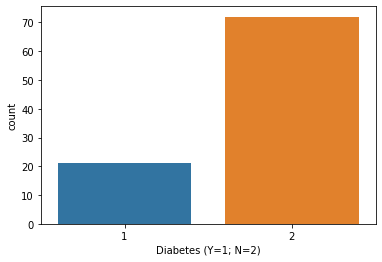

Comorbitities (Less than or equal to two = 1; Three or more = 2) WRITE "Less" or "More"


C:\Users\andre\PycharmProjects\varus\venv\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


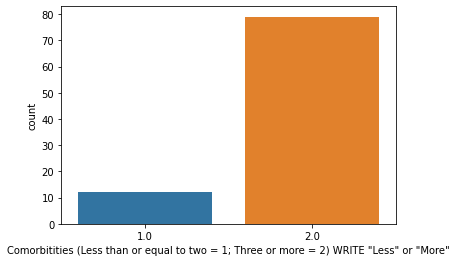

Diagnosis (OA = 1; IA = 2; PTOA = 3; OA + IA = 4; OA + PTOA = 5)


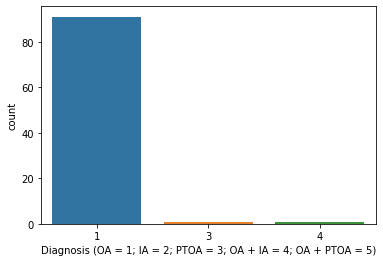

Presence of PreOp Flexion Contracture (Y=1; N=2)


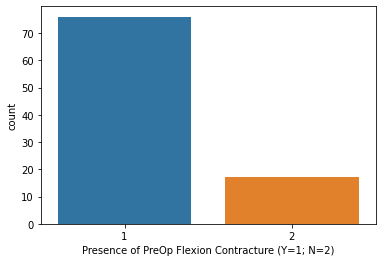

Tibial plateau fracture (Y=1; N=2)


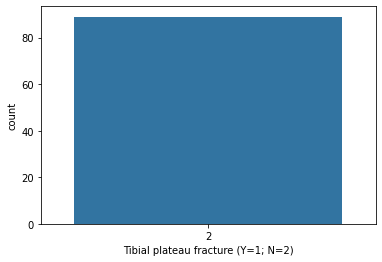

Tibial component size


C:\Users\andre\PycharmProjects\varus\venv\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


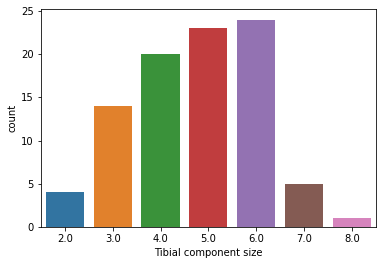

Femoral component size


C:\Users\andre\PycharmProjects\varus\venv\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


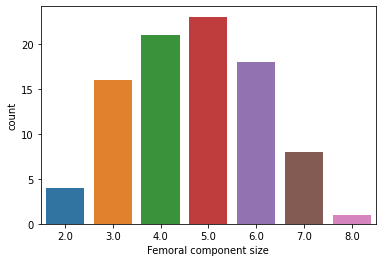

Discharge destination (1=home; 2=rehab)


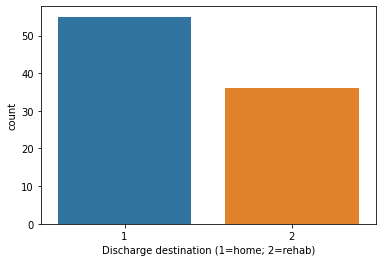

Readmission w/in 90 days (Y=1; N=2)


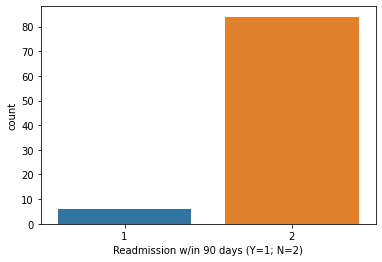

Reoperation (Y=1; N=2)


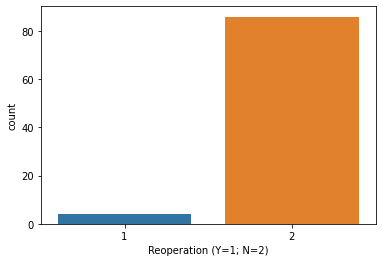

PostOp Infection  (Y=1; N=2)


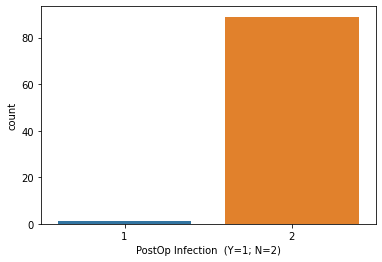

Evidence of Hardware Failure (Y=1; N=2)


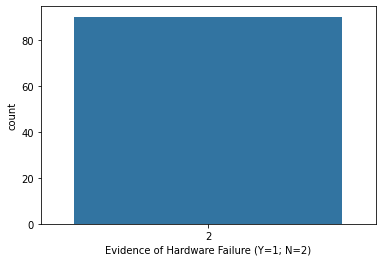

Fracture   (Y=1; N=2)


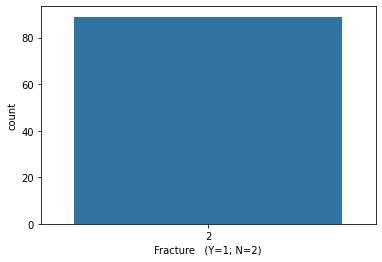

Subsidence   (Y=1; N=2)


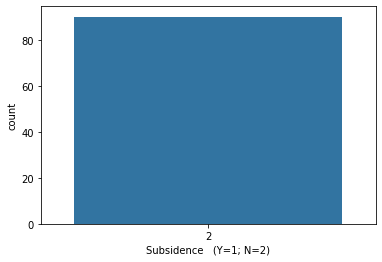

Loosening   (Y=1; N=2)


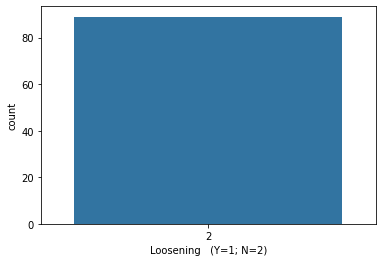

Polyethylene Wear (Y=1; N=2)


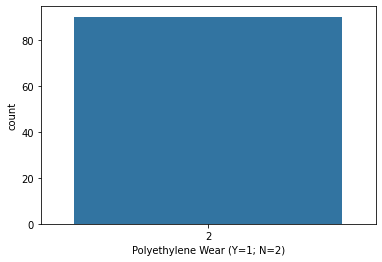

3mo PostOp Radiolucent lines (Y=1; N=2)


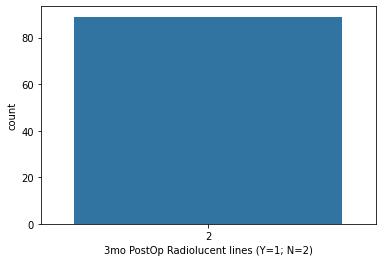

Final FU Radiolucent lines (Y=1; N=2)


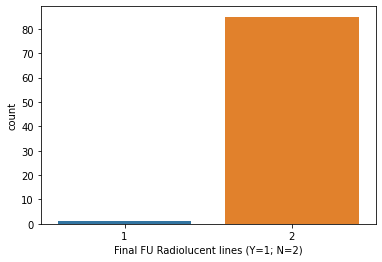

3mo PostOp Stress shielding (Y=1; N=2)


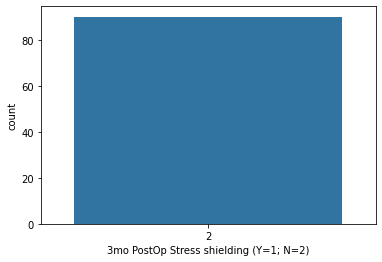

Final FU Stress shielding (Y=1; N=2)


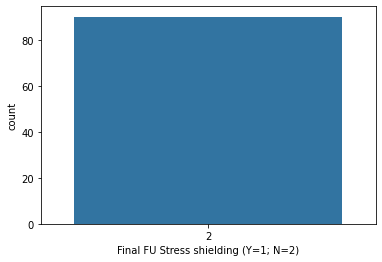

In [320]:
varus_out_cat[column_categorical_lst] = varus_outliers[column_categorical_lst].astype(dtype='category')

for col in column_categorical_lst:
    print(col)
    sns.countplot(x=col, data=varus_out_cat)
    plt.show()

